# Data Exploration, week 08 project

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime
import os

plt.rcParams['figure.figsize'] = (10,6)

In [66]:
#monday = pd.read_csv('data/monday.csv', delimiter=';')
#tuesday = pd.read_csv('data/tuesday.csv', delimiter=';')
#wednesday = pd.read_csv('data/wednesday.csv', delimiter=';')
#thursday = pd.read_csv('data/thursday.csv', delimiter=';')
#friday = pd.read_csv('data/friday.csv', delimiter=';')
df_day = pd.read_csv('data/wednesday.csv', delimiter=';')

In [34]:
def read_five_days():
    '''
    Reads the five csv of the supermarket dataset and returns them within 
    one dataframe, with customer_no adjusted for respective day-of-week.
    '''
    dirname = './data/'
    files = [f for f in os.listdir(dirname) if f.endswith('.csv')]
    
    dfs = []
    for f in files:
        day = f[:-4]
        df = pd.read_csv(dirname + f, sep=';')
        df['customer_no'] = day + '_' + df['customer_no'].astype(str)
        dfs.append(df)
    
    df = pd.concat(dfs)
    
    df.reset_index(inplace = True)
    df.drop(columns='index', inplace=True)
    
    return df

In [35]:
df = read_five_days()

In [36]:
df.head()

,timestamp,customer_no,location
0,2019-09-06 07:00:00,friday_1,dairy
1,2019-09-06 07:00:00,friday_2,drinks
2,2019-09-06 07:00:00,friday_3,fruit
3,2019-09-06 07:01:00,friday_2,checkout
4,2019-09-06 07:01:00,friday_4,drinks


In [37]:
df.shape

(24877, 3)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24877 entries, 0 to 24876
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    24877 non-null  object
 1   customer_no  24877 non-null  object
 2   location     24877 non-null  object
dtypes: object(3)
memory usage: 583.2+ KB


In [39]:
def ts_to_datetime(df):
    df.copy()
    
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    
    return df

In [67]:
df2 = ts_to_datetime(df)
df_day = ts_to_datetime(df_day)

In [68]:
def add_prev_loc_and_time_spent_columns(df):
    '''
    Adds a column supermarket dataframe stating if the previous location of the row
    to show where the respective customer is coming from and
    a column how much time in minutes the custoemr spend at the previous location.
    
    Parameters:
    ----------
    DataFrame
    '''
    
    df = df.copy()
    
    customer_prev_loc = {}
    previous_location = []
    time_spent = []
    
    for row in df.index:
        cust_no = df.loc[row]['customer_no']
        new_location = df.loc[row]['location']
        time_entered = df.loc[row]['timestamp']
        
        if cust_no not in customer_prev_loc:
            customer_prev_loc[cust_no] = [new_location, time_entered]
            previous_location.append('first')
            time_spent.append(0)
        else:
            old_location = customer_prev_loc[cust_no][0]
            old_time_entered = customer_prev_loc[cust_no][1]
            
            time_delta = time_entered - old_time_entered
            minutes_spent_at_previous = int(time_delta.total_seconds() / 60) % 60
            
            previous_location.append(old_location)
            time_spent.append(minutes_spent_at_previous)
            customer_prev_loc[cust_no] = [new_location, time_entered]
    
    df['previous_location'] = previous_location
    df['min_spent_at_previous'] = time_spent
    
    return df

In [69]:
df2 = add_prev_loc_and_time_spent_columns(df2)
df2

,timestamp,customer_no,location,previous_location,min_spent_at_previous
0,2019-09-06 07:00:00,friday_1,dairy,first,0
1,2019-09-06 07:00:00,friday_2,drinks,first,0
2,2019-09-06 07:00:00,friday_3,fruit,first,0
3,2019-09-06 07:01:00,friday_2,checkout,drinks,1
4,2019-09-06 07:01:00,friday_4,drinks,first,0
...,...,...,...,...,...
24872,2019-09-04 21:48:00,wednesday_1528,spices,drinks,3
24873,2019-09-04 21:49:00,wednesday_1520,dairy,spices,1
24874,2019-09-04 21:49:00,wednesday_1529,dairy,fruit,2
24875,2019-09-04 21:49:00,wednesday_1530,fruit,spices,2


In [74]:
df_day = add_prev_loc_and_time_spent_columns(df_day)

#### Calculate the total number of customers in each section

In [47]:
df2['location'].value_counts()

checkout    7417
fruit       5122
dairy       4679
drinks      3905
spices      3754
Name: location, dtype: int64

In [48]:
df2['customer_no'].unique()[-1:]

array(['wednesday_1531'], dtype=object)

==> 5 customers are not accounted for at checkout

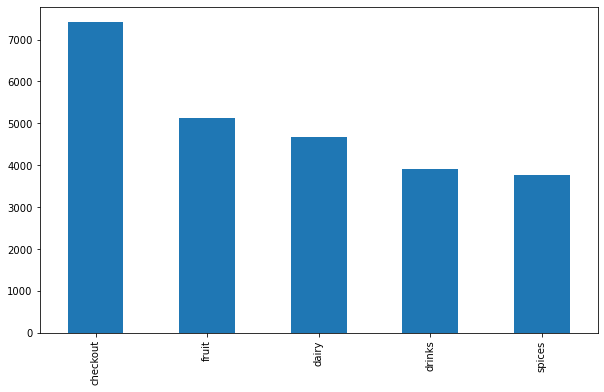

In [49]:
df['location'].value_counts().plot.bar()

#### Display the number of customers at checkout over time

In [50]:
df2[df2['location'] == 'checkout'].groupby(['timestamp'])['customer_no'].count()

timestamp
2019-09-02 07:05:00    2
2019-09-02 07:06:00    2
2019-09-02 07:07:00    1
2019-09-02 07:08:00    3
2019-09-02 07:09:00    1
                      ..
2019-09-06 21:37:00    1
2019-09-06 21:45:00    1
2019-09-06 21:47:00    2
2019-09-06 21:48:00    2
2019-09-06 21:50:00    2
Name: customer_no, Length: 3460, dtype: int64

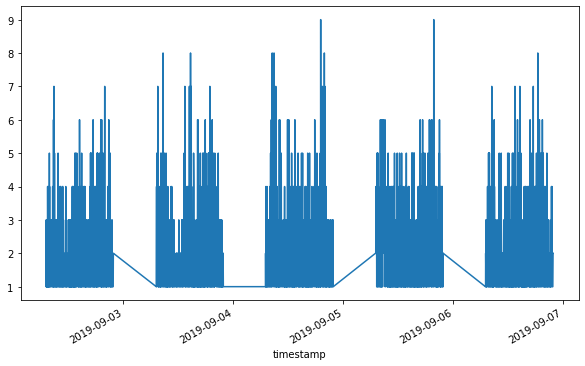

In [51]:
df2[df2['location'] == 'checkout'].groupby(['timestamp'])['customer_no'].count().plot()

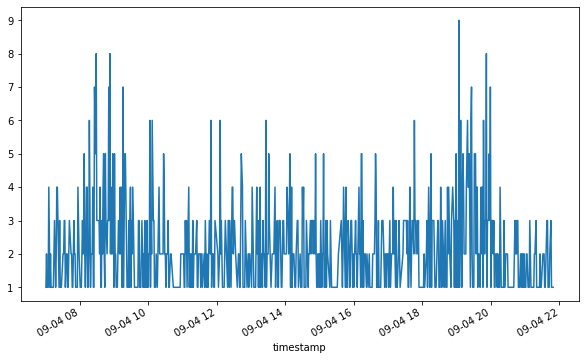

In [71]:
df_day[df_day['location'] == 'checkout'].groupby(['timestamp'])['customer_no'].count().plot()

#### Calculate the time each customer spent in the market

In [52]:
df2.groupby('customer_no')['min_spent_at_previous'].sum()

customer_no
friday_1          5
friday_10         5
friday_100        1
friday_1000       1
friday_1001      10
                 ..
wednesday_995    28
wednesday_996    11
wednesday_997    22
wednesday_998     6
wednesday_999     1
Name: min_spent_at_previous, Length: 7445, dtype: int64

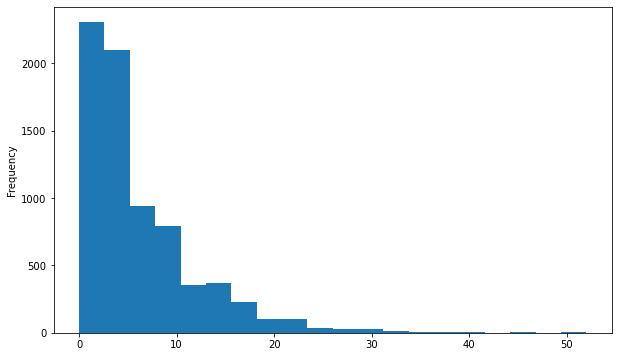

In [53]:
df2.groupby('customer_no')['min_spent_at_previous'].sum().plot.hist(bins=20)

#### Calculate the total number of customers in the supermarket over time.

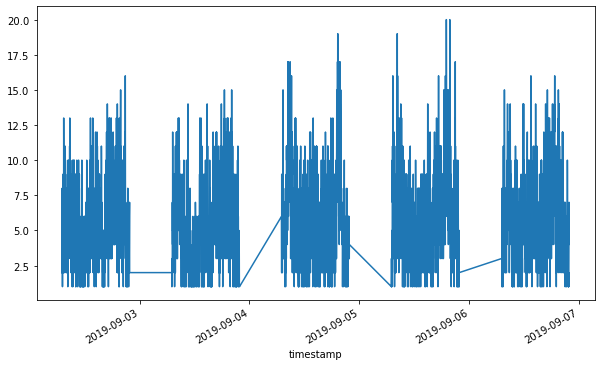

In [64]:
df2.groupby('timestamp')['customer_no'].count().plot()

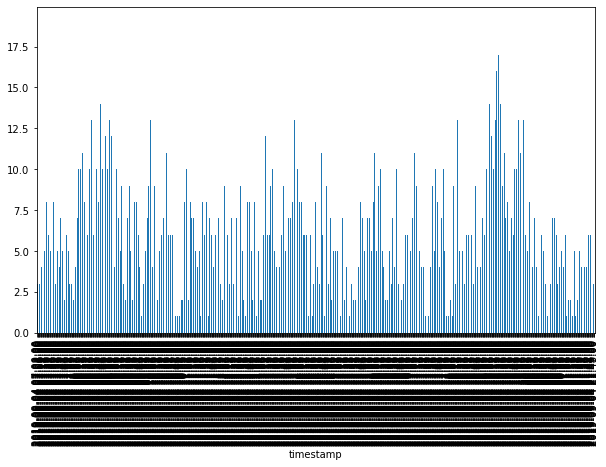

In [72]:
df_day.groupby('timestamp')['customer_no'].count().plot.bar()

In [65]:
def add_in_store_count_col(df):
    '''
    Adds a column with the number of customers currently in the supermarket
    at the time of the timestamp.
    
    => ONLY WORKS WITH SINGLE DAY DATAFRAME!
    '''
    
    df = df.copy()

    customers_in_store = []
    count = 0
    for row in df.index:
        if df.loc[row]['previous_location'] == 'first':
            count += 1
        if df.loc[row]['location'] == 'checkout':
            count -= 1
        customers_in_store.append(count)

    df['customers_in_store'] = customers_in_store

    return df

In [75]:
df_day = add_in_store_count_col(df_day)
df_day.head()

,timestamp,customer_no,location,previous_location,min_spent_at_previous,customers_in_store
0,2019-09-04 07:00:00,1,fruit,first,0,1
1,2019-09-04 07:00:00,2,dairy,first,0,2
2,2019-09-04 07:00:00,3,fruit,first,0,3
3,2019-09-04 07:00:00,4,fruit,first,0,4
4,2019-09-04 07:00:00,5,dairy,first,0,5


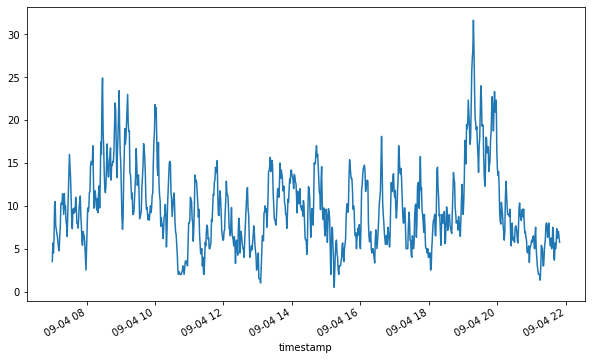

In [78]:
df_day.groupby('timestamp')['customers_in_store'].mean().plot()

#### Calculate the total number of customers in each section over time

In [79]:
def add_customer_in_locations_cols(df):    
    '''
    This function adds columns for each location (except checkout) 
    with the count of customers currently in them at each row.
    
    => ONLY WORKS WITH SINGLE DAY DATAFRAME!
    '''
    
    
    df = df.copy()
    
    customers_in_fruit = []
    customers_in_dairy = []
    customers_in_drinks = []
    customers_in_spices = []
    customers_in_checkout = []

    fruit_count = 0
    dairy_count = 0
    drinks_count = 0
    spices_count = 0



    for row in df.index:
        if df.loc[row]['location'] == 'fruit':
            fruit_count += 1
        if df.loc[row]['location'] == 'dairy':
            dairy_count  += 1
        if df.loc[row]['location'] == 'drinks':
            drinks_count  += 1
        if df.loc[row]['location'] == 'spices':
            spices_count  += 1

        if df.loc[row]['previous_location'] == 'fruit':
            fruit_count  -= 1
        if df.loc[row]['previous_location'] == 'dairy':
            dairy_count  -= 1
        if df.loc[row]['previous_location'] == 'drinks':
            drinks_count  -= 1
        if df.loc[row]['previous_location'] == 'spices':
            spices_count  -= 1


        customers_in_fruit.append(fruit_count)
        customers_in_dairy.append(dairy_count)
        customers_in_drinks.append(drinks_count)
        customers_in_spices.append(spices_count)

    df['customers_in_fruit'] = customers_in_fruit
    df['customers_in_dairy'] = customers_in_dairy
    df['customers_in_drinks'] = customers_in_drinks
    df['customers_in_spices'] = customers_in_spices

    return df

In [80]:
df_day = add_customer_in_locations_cols(df_day)

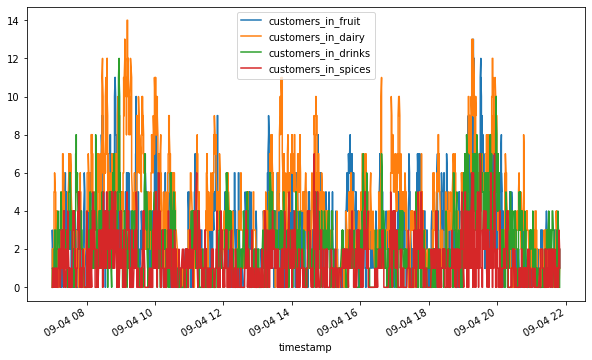

In [81]:
df_day.set_index('timestamp')[['customers_in_fruit', 'customers_in_dairy', 'customers_in_drinks', 'customers_in_spices']].plot()

#### Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

In [82]:
def barplot_comparing_first_followed(df):
    first = df[df['previous_location'] == 'first']['location'].value_counts()
    following = df[df['previous_location'] != 'first']['location'].value_counts()
    pd.DataFrame(following).join(pd.DataFrame(first), lsuffix='_following', rsuffix='_first').drop('checkout').plot.bar()

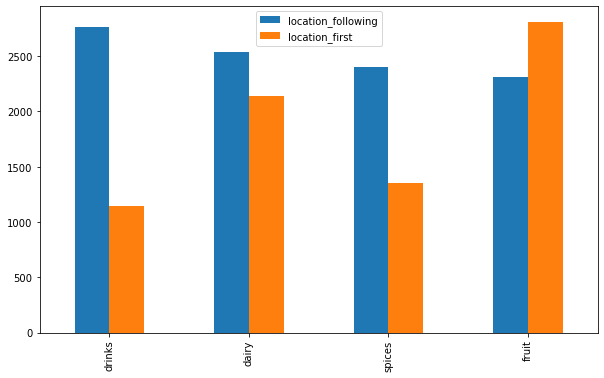

In [83]:
barplot_comparing_first_followed(df2)

### Estimate the total revenue for a customer using the following table:

    section | revenue per minute
    fruit   | 4€
    spices  | 3€
    dairy   | 5€
    drinks  | 6€

Which is the most profitable section according to your data?

In [84]:
def calculate_location_revenue(df):
    '''
    Calculates revenue for each location based on minutes spend there by each customer.
    Revenue per minute from Course Material:
    fruit   | 4€
    spices  | 3€
    dairy   | 5€
    drinks  | 6€ 
    
    Returns a new dataframe with the Revenue for each location.
    
    Parameters:
    -----------
    DataFrame - with supermarket data, extended by a column 'previous_location' and 'min_spent_at_previous'
    '''
    # Create new dataframe with revenue per minute
    revenue = pd.DataFrame(data=[4, 3, 5, 6], index=['fruit', 'spices', 'dairy', 'drinks'], columns=['revenue_per_minute'])
    
    # Sum the minutes spend by customers at each location
    total_minutes = df.groupby('previous_location')['min_spent_at_previous'].sum()
    
    # join the data into the revenue dataframe
    revenue = revenue.join(pd.DataFrame(total_minutes).drop('first'))
    
    # Create Column for total revenue of each location
    revenue['revenue_euro'] = revenue['revenue_per_minute'] * revenue['min_spent_at_previous']
    
    # Sort by highest revenue first
    revenue.sort_values('revenue_euro', ascending = False, inplace = True)
    
    # Print result
    print(f'''The location with the highest total revenue is {revenue.index[0]} with {revenue['revenue_euro'][0]} € of revenue.''')
    
    return revenue

In [85]:
revenue_df = calculate_location_revenue(df2)
revenue_df

The location with the highest total revenue is dairy with 88800 € of revenue.


,revenue_per_minute,min_spent_at_previous,revenue_euro
dairy,5,17760,88800
drinks,6,9724,58344
fruit,4,12701,50804
spices,3,6273,18819


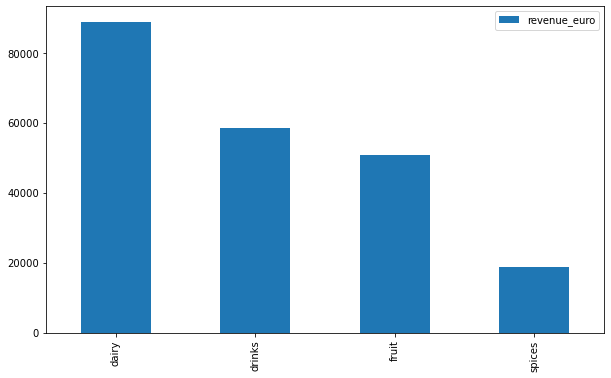

In [87]:
revenue_df[['revenue_euro']].plot.bar()